In [ ]:
# Using lambda
f = lambda x: x**2 - 2

# Using def
def f(x):
    return x**2 - 2


In [1]:
def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    #f the function used
    #df the derivative of the function
    #x0 the initial guess
    #tol the tolerance for the convergence
    #max_iter the maximum number of allowed iterations
    x = x0
    for i in range(max_iter):
        x_new = x - f(x) / df(x)
        if abs(x_new - x) < tol:
            return x_new
        x = x_new
    raise ValueError(f"No root found after {max_iter} iterations")

# Example usage:
f = lambda x: x**2 - 2
df = lambda x: 2*x
root = newton_raphson(f, df, x0=1)
print("Root:", root)


Root: 1.4142135623730951


In [2]:
from scipy.optimize import newton

# Define the function and its derivative
f = lambda x: x**2 - 2
df = lambda x: 2*x

# Use newton method from scipy
root = newton(f, x0=1, fprime=df)
print("Root:", root)


Root: 1.4142135623730951


cubic splines

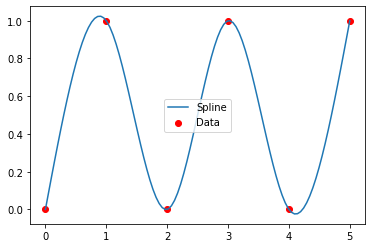

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def cubic_spline_coefficients(x, y):
    n = len(x) - 1
    h = np.diff(x)
    alpha = np.zeros(n)
    
    for i in range(1, n):
        alpha[i] = (3/h[i]) * (y[i+1] - y[i]) - (3/h[i-1]) * (y[i] - y[i-1])
    
    l = np.zeros(n+1)
    mu = np.zeros(n)
    z = np.zeros(n+1)
    
    l[0] = 1
    for i in range(1, n):
        l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]
    l[n] = 1
    
    b = np.zeros(n)
    c = np.zeros(n+1)
    d = np.zeros(n)
    for j in range(n-1, -1, -1):
        c[j] = z[j] - mu[j] * c[j+1]
        b[j] = (y[j+1] - y[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
        d[j] = (c[j+1] - c[j]) / (3 * h[j])
        
    a = y[:-1]
    return a, b, c, d

x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 1, 0, 1, 0, 1])
a, b, c, d = cubic_spline_coefficients(x, y)

# Evaluate spline at x_val
def evaluate_spline(x, a, b, c, d, x_val):
    for i in range(len(x) - 1):
        if x[i] <= x_val <= x[i + 1]:
            dx = x_val - x[i]
            return a[i] + b[i] * dx + c[i] * dx**2 + d[i] * dx**3
    return None  # x_val is out of range


x_new = np.linspace(x.min(), x.max(), 100)
y_new = [evaluate_spline(x, a, b, c, d, x_val) for x_val in x_new]


plt.plot(x_new, y_new, label="Spline")
plt.scatter(x, y, color="red", label="Data")
plt.legend()
plt.show()


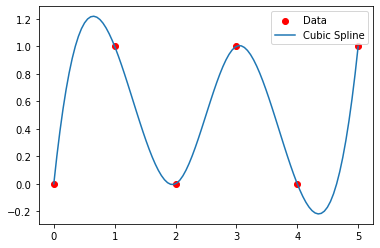

In [1]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt


x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 1, 0, 1, 0, 1])


cs = CubicSpline(x, y)


x_new = np.linspace(x.min(), x.max(), 100)
y_new = cs(x_new)

# Plot the original data and the spline
plt.scatter(x, y, color='red', label='Data')
plt.plot(x_new, y_new, label='Cubic Spline')
plt.legend()
plt.show()


Gauss Newton

In [2]:
import numpy as np

def gauss_newton(x, y, p0, max_iter=100, tol=1e-10):
    def residuals(p):
        return y - (p[0] + p[1]*x + p[2]*x**2)

    def jacobian(p):
        J = np.zeros((len(x), 3))
        J[:, 0] = 1
        J[:, 1] = x
        J[:, 2] = x**2
        return J

    p = p0.copy()
    for i in range(max_iter):
        r = residuals(p)
        J = jacobian(p)
        
        # Calculate the update
        delta_p = np.linalg.lstsq(J.T @ J, J.T @ r, rcond=None)[0]
        
        # Update the parameters
        p += delta_p
        
        # Check for convergence
        if np.linalg.norm(delta_p) < tol:
            break

    return p

# Sample data
x_data = np.array([0, 1, 2, 3, 4])
y_data = np.array([0, 1, 0.8, 3, 4])
p0 = np.array([0.5, 0.5, 0.5])

p_optimal = gauss_newton(x_data, y_data, p0)
print(p_optimal)


[0.10285714 0.31428571 0.17142857]


Levenberg-Maquardt

In [3]:
from scipy.optimize import least_squares

def residuals(p, x, y):
    return y-(p[0]+p[1]*x+p[2]*x**2)

def fit_levenberg_marquardt(x, y, p0):
    result = least_squares(residuals, p0, args=(x,y))
    return result.x

x_data = np.array([0, 1, 2, 3, 4])
y_data = np.array([0, 1, 0.8, 3, 4])
p0 = np.array([0.5, 0.5, 0.5])
p_optimal = fit_levenberg_marquardt(x_data, y_data, p0)
print(p_optimal)

[0.10285714 0.31428571 0.17142857]


In [4]:
from scipy.optimize import curve_fit

def model(x, p0, p1, p2):
    return p0 + p1*x +p2*x**2

p_optimal, _ = curve_fit(model, x_data, y_data, p0)
print(p_optimal)

[0.10285714 0.31428571 0.17142857]
